In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
price=pd.read_csv(r"C:\Users\ASUS\Downloads\archive\Bengaluru_House_Data.csv")

In [3]:
price.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
price.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
#we check types of values in each column
for col in price.columns:
    print(price[col].value_counts())
    print('<->'*10)
    print('\n')

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
<-><-><-><-><-><-><-><-><-><->


Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
<-><-><-><-><-><-><-><-><-><->


Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
<-><-><-><-><-><-><-><-><-><-

In [7]:
# data cleaning

In [8]:
#checking null
price.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
#checking values corr with price
price.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


<AxesSubplot:>

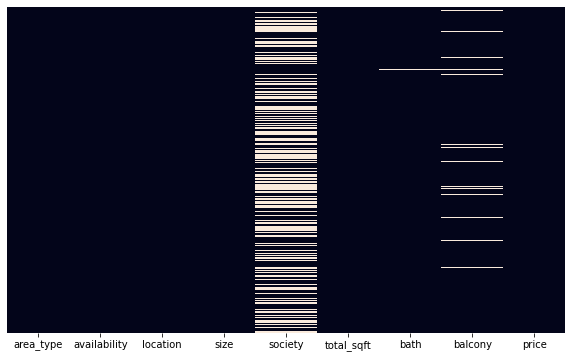

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(price.isnull(),cbar=False,yticklabels=False,cmap='rocket',linecolor='red')

In [11]:
#from graph there is more null values in balcony so we can drop balcony column 

In [12]:
price.drop(['area_type','availability','society','balcony'],axis=1,inplace=True)

In [13]:
price.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
price.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [15]:
price['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [16]:
price['location'].isna().sum()

1

In [17]:
price['location']=price['location'].fillna('Sarjapur Road')

In [18]:
price['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [19]:
price['size'].isna().sum()

16

In [20]:
price['size']=price['size'].fillna('2 BHK')

In [21]:
price['size'].value_counts()

2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [22]:
#we fill bath null value with area median
price['bath']=price['bath'].fillna(price['bath'].median())

In [23]:
price.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [24]:
price.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [25]:
# now we convert size which is str to int
price['rooms']=price['size'].str.split().str.get(0).astype(int)

In [26]:
#add that room col at 2 pos (index=1)
price.insert(1,"room",price['rooms'])

# it will duplicate complete column so we need to delete first one 

In [27]:
price.head()

,location,room,size,total_sqft,bath,price,rooms
0,Electronic City Phase II,2,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3,3 BHK,1521,3.0,95.00,3
4,Kothanur,2,2 BHK,1200,2.0,51.00,2


In [28]:
price.drop(['size','rooms'],axis=1,inplace=True)

In [29]:
price.head()

,location,room,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


<Figure size 720x432 with 0 Axes>

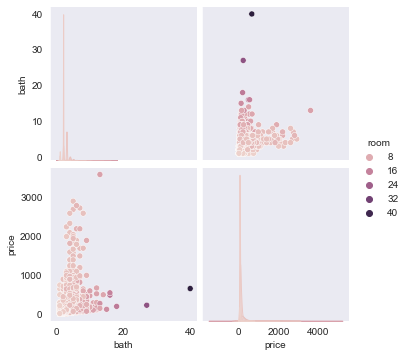

In [30]:
sns.set_style('dark')
plt.figure(figsize=(10,6))
sns.pairplot(price,hue='room')

In [31]:
#converting sq_ft column from object to float
price['total_sqft'] = pd.to_numeric(price.total_sqft,errors='coerce')

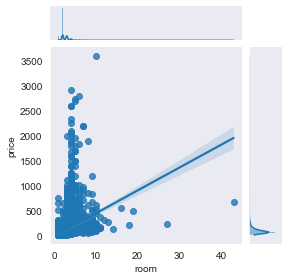

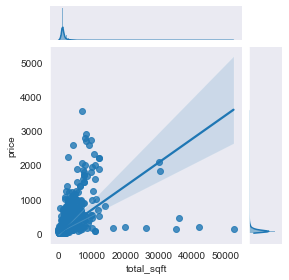

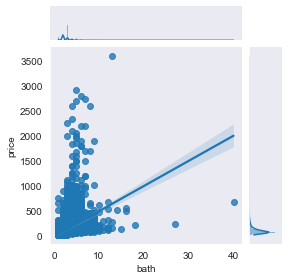

In [32]:
sns.jointplot(x='room',y='price',data=price,kind='reg',height=4)
sns.jointplot(x='total_sqft',y='price',data=price,kind='reg',height=4)
sns.jointplot(x='bath',y='price',data=price,kind='reg',height=4)

In [33]:
price.head()

,location,room,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [34]:
price.corr()

,room,total_sqft,bath,price
room,1.000000,0.341878,0.895786,0.398074
total_sqft,0.341878,1.000000,0.386696,0.572904
bath,0.895786,0.386696,1.000000,0.454449
price,0.398074,0.572904,0.454449,1.000000


In [35]:
price['price_per_sqft']=price['price']*100000/price['total_sqft']

In [36]:
price.head()

,location,room,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [37]:
#feature engineering

In [38]:
price['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [39]:
# we will put houses in area less than or equal 10 in other category
price['location']=price['location'].apply(lambda x:x.strip())
location_count = price['location'].value_counts()

In [40]:
location_count_less=location_count[location_count<=10]

In [41]:
location_count_less

BTM 1st Stage                         10
Nagadevanahalli                       10
Basapura                              10
Sector 1 HSR Layout                   10
Dairy Circle                          10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: location, Length: 1054, dtype: int64

In [42]:
price['location']=price['location'].apply(lambda x: 'other' if x in location_count_less else x)

In [43]:
price['location'].value_counts()

other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [44]:
dp=price[((price['total_sqft']/price['room'])<300)]

In [45]:
dp

,location,room,total_sqft,bath,price,price_per_sqft
9,other,6,1020.0,6.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,200.0,33333.333333
58,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810
68,Devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296
70,other,3,500.0,3.0,100.0,20000.000000
...,...,...,...,...,...,...
13277,other,7,1400.0,7.0,218.0,15571.428571
13279,other,6,1200.0,5.0,130.0,10833.333333
13281,Margondanahalli,5,1375.0,5.0,125.0,9090.909091
13303,Vidyaranyapura,5,774.0,5.0,70.0,9043.927649


In [46]:
dp.describe()

,room,total_sqft,bath,price,price_per_sqft
count,744.000000,744.000000,744.000000,744.000000,7.440000e+02
mean,5.342742,971.224462,4.840054,130.495054,3.491305e+04
std,2.620347,452.337485,2.717266,81.466194,4.486481e+05
min,1.000000,1.000000,1.000000,8.000000,2.045455e+03
25%,4.000000,600.000000,3.000000,77.750000,9.430544e+03
50%,5.000000,942.500000,4.000000,110.000000,1.250000e+04
75%,6.000000,1200.000000,6.000000,165.000000,1.625000e+04
max,43.000000,8000.000000,40.000000,675.000000,1.200000e+07


In [47]:
#remove outliers

In [48]:
# these are outliers (because these are miis entries or errors example: 45 index 8 rooms and 600 sq_ft )
#300 is here threshold minimum 

In [49]:
#remove outliers
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_output=pd.concat([df_output, gen_df], ignore_index=True)
    return df_output
data=remove_outliers_sqft(price)
data.head()

,location,room,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,6,1200.0,6.0,125.0,10416.666667
3,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
4,1st Block Jayanagar,7,930.0,4.0,85.0,9139.784946


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        11330 non-null  object 
 1   room            11330 non-null  int32  
 2   total_sqft      11330 non-null  float64
 3   bath            11330 non-null  float64
 4   price           11330 non-null  float64
 5   price_per_sqft  11330 non-null  float64
dtypes: float64(4), int32(1), object(1)
memory usage: 487.0+ KB


In [51]:
data.describe()

,room,total_sqft,bath,price,price_per_sqft
count,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000
mean,2.722771,1533.773876,2.609444,105.359801,6325.737281
std,1.157788,1144.737930,1.206932,139.112464,3657.512789
min,1.000000,250.000000,1.000000,8.000000,267.829813
25%,2.000000,1100.000000,2.000000,50.000000,4285.714286
50%,3.000000,1277.000000,2.000000,70.000000,5330.490405
75%,3.000000,1655.000000,3.000000,110.000000,6875.000000
max,27.000000,52272.000000,27.000000,3600.000000,53150.000000


In [52]:
# as u can see min and max values are now reasonable

In [53]:
# now we see 2bhk and 3bhk price diff area sqft wise

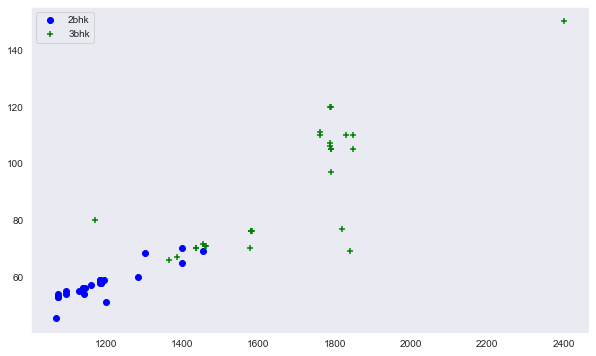

In [54]:
def plotscatter(df,location):
    plt.figure(figsize=(10,6))
    bhk2=data[(df.location==location) & (df.room==2)]
    bhk3=data[(df.location==location) & (df.room==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3bhk')
    plt.xlabel=('total area')
    plt.ylabel=('price')
    plt.title=(location)
    plt.legend()

plotscatter(data,'Kothanur')

In [55]:
# model building using linear regresion and random forest 

In [56]:
data.head()

,location,room,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,6,1200.0,6.0,125.0,10416.666667
3,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
4,1st Block Jayanagar,7,930.0,4.0,85.0,9139.784946


In [57]:
data.drop(['price_per_sqft'],axis=1,inplace=True)

In [58]:
data.head()

,location,room,total_sqft,bath,price
0,1st Block Jayanagar,4,2850.0,4.0,428.0
1,1st Block Jayanagar,3,1630.0,3.0,194.0
2,1st Block Jayanagar,6,1200.0,6.0,125.0
3,1st Block Jayanagar,3,1875.0,2.0,235.0
4,1st Block Jayanagar,7,930.0,4.0,85.0


In [59]:
# we great dummies
a=pd.get_dummies(data['location'])

In [60]:
a.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
data=pd.concat([data,a],axis=1)
data.drop('location',axis=1,inplace=True)

In [62]:
# we will droopp last column because if all 0 then that is 1
data.drop('other',axis=1,inplace=True)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Columns: 245 entries, room to Yeshwanthpur
dtypes: float64(3), int32(1), uint8(241)
memory usage: 2.9 MB


In [64]:
# now we import model
from sklearn.model_selection import train_test_split

In [65]:
X=data.drop('price',axis=1)
y=data['price']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr=LinearRegression()

In [69]:
lr.fit(X_train,y_train)

LinearRegression()

In [70]:
#check how good our model is
k1=lr.score(X_test,y_test)
k1

0.7181839544713005

In [71]:
pred=lr.predict(X_test)

In [72]:
pred

array([144.66272578, 112.5466209 , 100.83670981, ...,  89.59027924,
        38.31458023, 162.70030712])

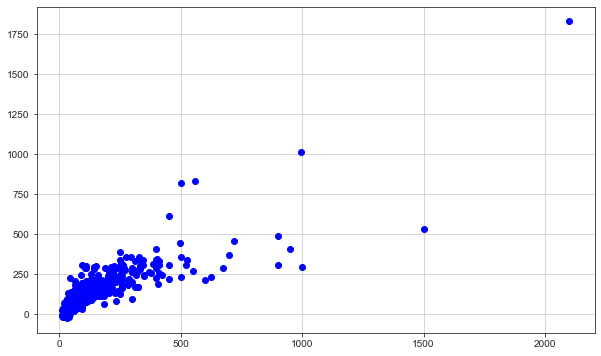

In [110]:
sns.set_style('ticks')
plt.figure(figsize=(10,6))
plt.scatter(y_test,pred,color='b')
plt.grid(True)


In [111]:
from sklearn.metrics import r2_score

In [112]:
r2_score(y_test,pred)

0.7181839544713005

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
tree=DecisionTreeRegressor(random_state=0)

In [115]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [116]:
k2=tree.score(X_test,y_test)
k2

0.17692825142118496

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
rd=RandomForestRegressor(random_state=0)

In [119]:
rd.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [120]:
k3=rd.score(X_test,y_test)
k3

0.6082826600665958

In [121]:
# now we compare 3 models
print('score of linear= ',round( k1*100))
print('score of tree= ',round( k2*100))
print('score of random forest= ',round( k3*100))

score of linear=  72
score of tree=  18
score of random forest=  61


In [122]:
#comparing 3 of them linear regresion works best here

In [123]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [124]:
mean_absolute_error(y_test,pred)

32.135879566346524

In [125]:
mean_squared_error(y_test,pred)

4579.71435784042

In [126]:
np.sqrt(mean_squared_error(y_test,pred))

67.67358685514179

<AxesSubplot:xlabel='price', ylabel='Count'>

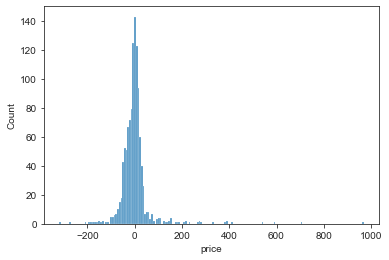

In [127]:
#plotting of residuals
sns.histplot(y_test-pred)